In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV # train_test_split用于数据集分割成训练集和测试集，GridSearchCV是用于模型选择和超参数调优的工具
from sklearn.ensemble import GradientBoostingRegressor

from scipy import stats# 统计方法，卡方检验

In [193]:
customers_data = pd.read_csv("E://FILE/py/project/BankChurners.csv")
customers_data = customers_data[customers_data.columns[:-2]]
customers_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [194]:
print("缺失值个数: ",customers_data.duplicated().sum())
print("重复值个数:\n",customers_data.isna().sum())
print("数据集信息:\n",customers_data.info())

缺失值个数:  0
重复值个数:
 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Custo

In [195]:
# 将流失情况用布尔值表示，0表示未流失，1表示流失
customers_data.loc[customers_data["Attrition_Flag"] == "Existing Customer", "Attrition_Flag"] = 0
customers_data.loc[customers_data["Attrition_Flag"] == "Attrited Customer", "Attrition_Flag"] = 1
customers_data.head(30)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,0,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,0,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,0,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [196]:
# 将流失情况的数据类型改为布尔型
customers_data['Attrition_Flag'] = customers_data['Attrition_Flag'].astype('int64')
# CLIENTNUM数据类型改为字符类型
customers_data['CLIENTNUM'] = customers_data['CLIENTNUM'].astype('str')
print(customers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  object 
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [197]:
# 设置显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

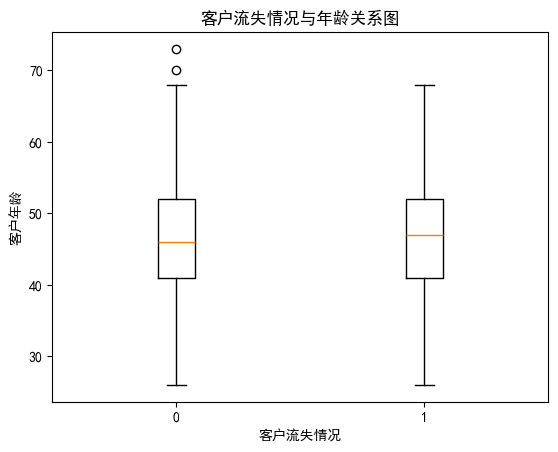

总客户数: 10127
流失客户数: 1627


In [198]:
# 客户流失与年龄的关系
x1 = customers_data['Attrition_Flag']
y1 = customers_data['Customer_Age']
plt.boxplot([y1[x1 == 0], y1[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户年龄')
plt.title('客户流失情况与年龄关系图')
plt.show()
print("总客户数:", customers_data.shape[0])
print("流失客户数:", x1.sum())

       Attrition_Flag       Churn_Rate
                  sum count           
Gender                                
F                 930  5358   0.173572
M                 697  4769   0.146152


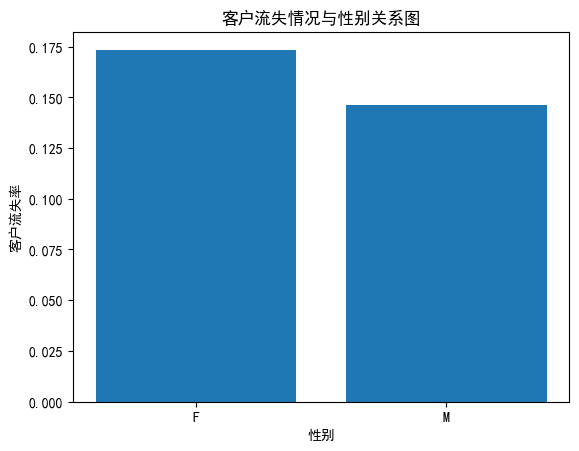

In [199]:
# 客户流失与性别的关系
gender_group = customers_data.groupby('Gender').agg({'Attrition_Flag': ['sum', 'count']})# 使用聚合函数对每个组进行操作。这里针对“Attrition_Flag”列分别计算“sum”（总和）和“count”（数量）
gender_group['Churn_Rate'] = gender_group[('Attrition_Flag','sum')] / gender_group[('Attrition_Flag', 'count')]# 计算每个性别组的流失率。通过用“Attrition_Flag”列的总和除以数量，得到流失率的值
print(gender_group)
plt.bar(gender_group.index, gender_group['Churn_Rate'])
plt.xlabel('性别')
plt.ylabel('客户流失率')
plt.title('客户流失情况与性别关系图')
plt.show()

In [ ]:
# 客户流失与教育水平的关系
edu_group = customers_data.groupby('Education_Level').agg({'Attrition_Flag': ['sum', 'count']})
edu_group['Churn_Rate'] = edu_group[('Attrition_Flag', 'sum')] / edu_group[('Attrition_Flag', 'count')]
edu_group = edu_group.drop(index = ['Unknown'])
print(edu_group)
plt.bar(edu_group.index, edu_group['Churn_Rate'])
plt.xlabel('教育水平')
plt.ylabel('客户流失率')
plt.title('客户流失情况与教育水平关系图')
plt.show()

               Attrition_Flag       Churn_Rate
                          sum count           
Marital_Status                                
Divorced                  121   748   0.161765
Married                   709  4687   0.151269
Single                    668  3943   0.169414


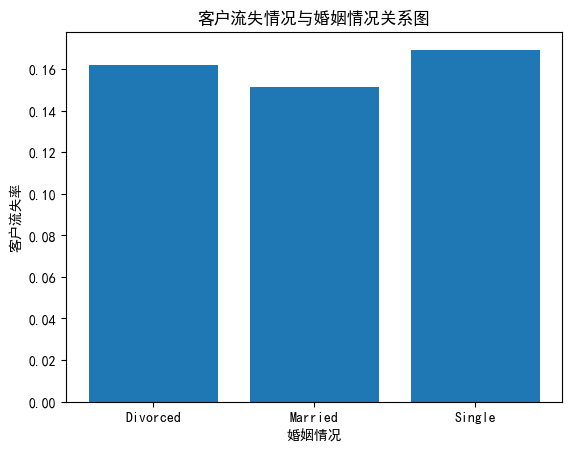

In [201]:
# 客户流失与婚姻情况的关系
maried_group = customers_data.groupby('Marital_Status').agg({'Attrition_Flag': ['sum', 'count']})# 使用聚合函数对每个组进行操作。这里针对“Attrition_Flag”列分别计算“sum”（总和）和“count”（数量）
maried_group['Churn_Rate'] = maried_group[('Attrition_Flag','sum')] / maried_group[('Attrition_Flag', 'count')]# 计算每个性别组的流失率。通过用“Attrition_Flag”列的总和除以数量，得到流失率的值
maried_group = maried_group.drop(index = ['Unknown'])
print(maried_group)
plt.bar(maried_group.index, maried_group['Churn_Rate'])
plt.xlabel('婚姻情况')
plt.ylabel('客户流失率')
plt.title('客户流失情况与婚姻情况关系图')
plt.show()

              Attrition_Flag       Churn_Rate
                         sum count           
Card_Category                                
Blue                    1519  9436   0.160979
Gold                      21   116   0.181034
Platinum                   5    20   0.250000
Silver                    82   555   0.147748


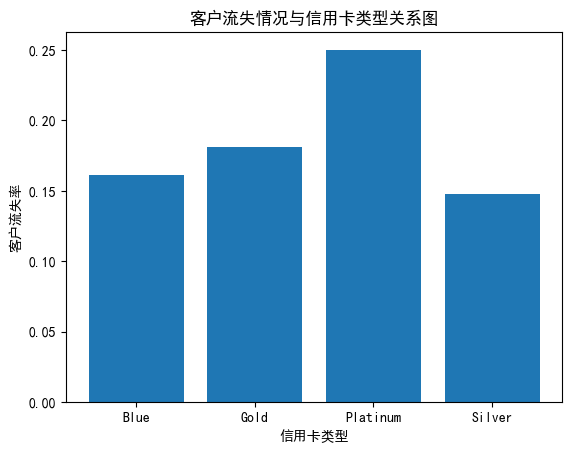

In [202]:
# 客户流失与信用卡类型的关系
card_group = customers_data.groupby('Card_Category').agg({'Attrition_Flag': ['sum', 'count']})
card_group['Churn_Rate'] = card_group[('Attrition_Flag', 'sum')] / card_group[('Attrition_Flag', 'count')]
print(card_group)
plt.bar(card_group.index, card_group['Churn_Rate'])
plt.xlabel('信用卡类型')
plt.ylabel('客户流失率')
plt.title('客户流失情况与信用卡类型关系图')
plt.show()

                Attrition_Flag       Churn_Rate
                           sum count           
Dependent_count                                
0                          135   904   0.149336
1                          269  1838   0.146355
2                          417  2655   0.157062
3                          482  2732   0.176428
4                          260  1574   0.165184
5                           64   424   0.150943


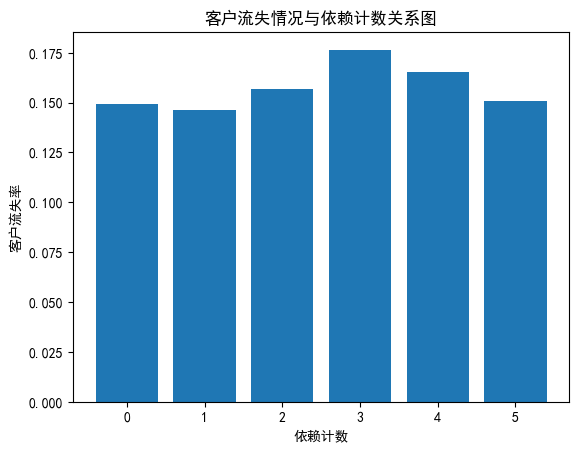

In [203]:
# 客户流失与依赖计数的关系
dep_group = customers_data.groupby('Dependent_count').agg({'Attrition_Flag': ['sum', 'count']})
dep_group['Churn_Rate'] = dep_group[('Attrition_Flag', 'sum')] / dep_group[('Attrition_Flag', 'count')]
print(dep_group)
plt.bar(dep_group.index, dep_group['Churn_Rate'])
plt.xlabel('依赖计数')
plt.ylabel('客户流失率')
plt.title('客户流失情况与依赖计数关系图')
plt.show()

                Attrition_Flag       Churn_Rate
                           sum count           
Income_Category                                
$120K +                    126   727   0.173315
$40K - $60K                271  1790   0.151397
$60K - $80K                189  1402   0.134807
$80K - $120K               242  1535   0.157655
Less than $40K             612  3561   0.171862


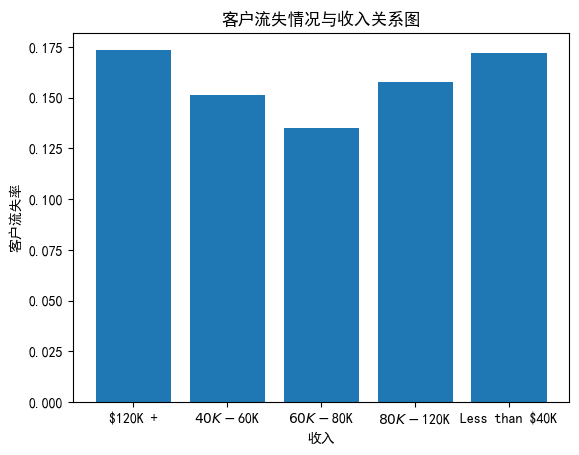

In [204]:
# 客户流失与收入的关系
inc_group = customers_data.groupby('Income_Category').agg({'Attrition_Flag': ['sum', 'count']})
inc_group['Churn_Rate'] = inc_group[('Attrition_Flag', 'sum')] / inc_group[('Attrition_Flag', 'count')]
inc_group = inc_group.drop(index = ['Unknown'])
print(inc_group)
plt.bar(inc_group.index, inc_group['Churn_Rate'])
plt.xlabel('收入')
plt.ylabel('客户流失率')
plt.title('客户流失情况与收入关系图')
plt.show()

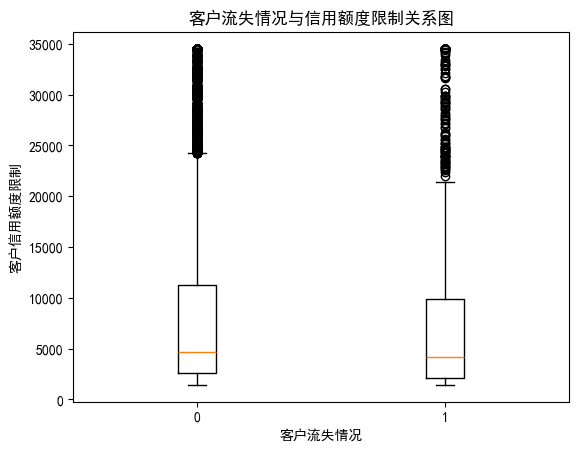

In [205]:
y2 = customers_data['Credit_Limit']
plt.boxplot([y2[x1 == 0], y2[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户信用额度限制')
plt.title('客户流失情况与信用额度限制关系图')
plt.show()

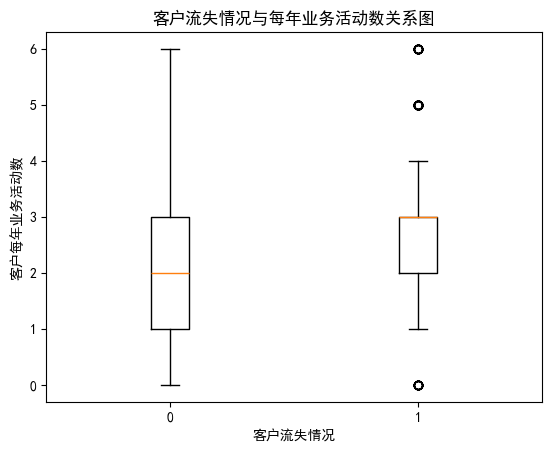

In [206]:
# 客户流失情况与每年业务活动数的关系
y3 = customers_data['Months_Inactive_12_mon']
plt.boxplot([y3[x1 == 0], y3[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户每年业务活动数')
plt.title('客户流失情况与每年业务活动数关系图')
plt.show()

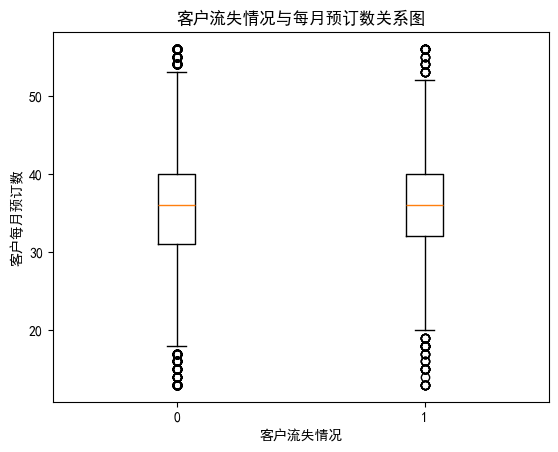

In [207]:
# 客户流失情况与每月预订数的关系
y4 = customers_data['Months_on_book']
plt.boxplot([y4[x1 == 0], y4[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户每月预订数')
plt.title('客户流失情况与每月预订数关系图')
plt.show()

In [208]:
# 数据清洗
# 删除不相关变量和多余变量
df = customers_data.drop(labels=['CLIENTNUM', 'Total_Relationship_Count', 'Contacts_Count_12_mon'],  axis=1)
df = df[df.columns[:-7]]
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0
...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,4003.0
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,4277.0
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,3,5409.0
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,5281.0


,Feature,Corr
0,Attrition_Flag,1.000000
4,Months_Inactive_12_mon,0.152449
2,Dependent_count,0.018991
1,Customer_Age,0.018203
3,Months_on_book,0.013687
5,Credit_Limit,-0.023873


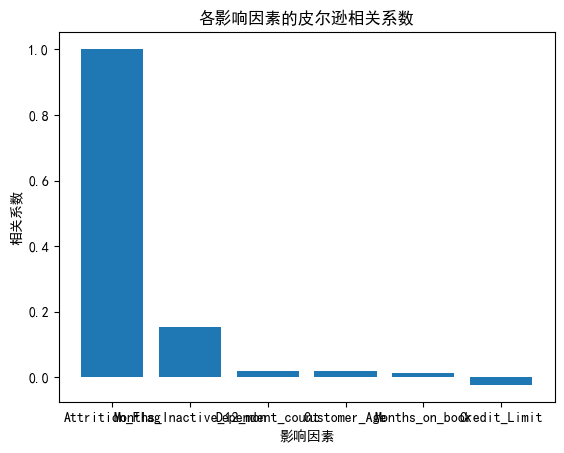

In [209]:
# 计算皮尔逊相关系数
num_df = df.select_dtypes(include=np.number)
corr_mar = num_df.corr()# 计算数据框各列之间的皮尔逊相关系数
corr_df = pd.DataFrame({'Corr':corr_mar['Attrition_Flag']}).reset_index().sort_values('Corr', ascending=False).rename(columns={'index':'Feature'})
display(corr_df)
F = corr_df['Feature']
C = corr_df['Corr']
plt.bar(F,C)
plt.xlabel('影响因素')
plt.ylabel('相关系数')
plt.title('各影响因素的皮尔逊相关系数')
plt.show()

In [210]:
# 卡方检验(分类变量)
def chi_square(data, features):
    results = pd.DataFrame(columns=['Feature', 'Chi_square', 'P_value'])
    for feature in features:
        crosstab = pd.crosstab(data[feature], data['Attrition_Flag'])# 使用 pd.crosstab 函数创建特定特征与'Exited'特征的列联表
        # pd.crosstab是pandas库中的一个函数，主要用于创建交叉表（列联表）。
        # 它接受两个或多个数组或序列作为参数，通过对这些数据进行统计计数，生成一个表格来展示不同类别组合出现的频数。
        chi_square, p_value, dof, expected = stats.chi2_contingency(crosstab)# 使用 stats.chi2_contingency 计算卡方值、p 值等
        row = {'Feature': feature, 'Chi_square': chi_square, 'P_value': p_value}
        results = results._append(row, ignore_index=True)
    return results
features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
chi_df = chi_square(df, features)
display(chi_df)

C:\Users\丁修凡\AppData\Local\Temp\ipykernel_26748\271319150.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = results._append(row, ignore_index=True)


,Feature,Chi_square,P_value
0,Gender,13.865614,0.000196
1,Education_Level,12.511205,0.051489
2,Marital_Status,6.056097,0.108913
3,Income_Category,12.832259,0.025002
4,Card_Category,2.234227,0.525238


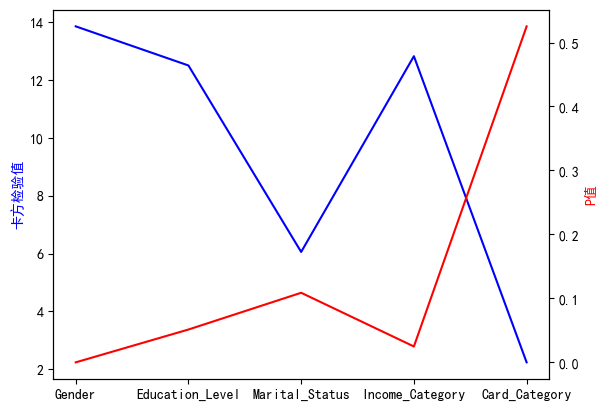

In [211]:
# 绘制卡方检验值和P值的折线图
fig, fig_chi = plt.subplots()# 创建图表，并设置一个主坐标轴对象
fig_fea = chi_df['Feature']# 提取横坐标环境因素
data_chi = chi_df['Chi_square']
data_p = chi_df['P_value']# 提取数据
line1 = fig_chi.plot(fig_fea, data_chi, color='b')# 绘制卡方检验值的折线
fig_chi.set_ylabel('卡方检验值', color='b')
fig_p = fig_chi.twinx()# 创建共享横坐标的右边纵坐标fig_p
line2 = fig_p.plot(fig_fea, data_p, color='r')
fig_p.set_ylabel('P值', color='r')
plt.xlabel('Features')
plt.show()

In [212]:
# 客户细分(K均值聚类算法)
df_kmeans = df.copy(deep=True)
df_kmeans['Gender'] = df_kmeans['Gender'].map({'M': 1, 'F': 0})
df_kmeans['Education_Level'] = df_kmeans['Education_Level'].map({'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6})
df_kmeans['Marital_Status'] = df_kmeans['Marital_Status'].map({'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3})
df_kmeans['Income_Category'] = df_kmeans['Income_Category'].map({'Unknown': 72000, 'Less than $40K': 20000, '$40K - $60K': 50000, '$60K - $80K': 70000, '$80K - $120K': 100000, '$120K +': 120000})
df_kmeans['Card_Category'] = df_kmeans['Card_Category'].map({'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3})
# 选择一些合适的连续变量特征
features = df_kmeans[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Months_Inactive_12_mon', 'Credit_Limit']]
# 进行数据标准化处理，减少数据之间误差
scaler = StandardScaler()
scaler_features = scaler.fit_transform(features)
# 创建聚类算法对象,并训练
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaler_features)
# 将聚类结果添加到df数据框里
df_kmeans['Clusters'] = clusters
display(df_kmeans[['Attrition_Flag', 'Clusters']].head())

,Attrition_Flag,Clusters
0,0,2
1,0,0
2,0,2
3,0,0
4,0,0


In [213]:
# 对三个客户群体进行分析各其特征和流失率
clusters_analysis = df_kmeans.groupby(by='Clusters').agg(
    {'Customer_Age': 'mean', 'Dependent_count': 'mean', 'Income_Category': 'mean', 'Months_on_book': 'mean', 'Months_Inactive_12_mon': 'mean', 'Credit_Limit': 'mean', 'Attrition_Flag': 'mean'}
).reset_index().round(2)
display(clusters_analysis)

,Clusters,Customer_Age,Dependent_count,Income_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Attrition_Flag
0,0,40.96,2.60,36622.21,31.17,2.30,4431.54,0.17
1,1,55.08,1.53,41192.93,43.63,2.45,4632.63,0.17
2,2,45.95,2.64,90154.22,35.64,2.31,15842.29,0.15


In [214]:
# GradientBoostingClassifier梯度提升算法
df_gdbt = df_kmeans[df_kmeans.columns[:-1]]
# 特征重要性分析
target = df_gdbt[['Attrition_Flag']]
df_gdbt = df_gdbt.drop(labels=['Attrition_Flag'], axis=1)
display(df_gdbt)
df_gdbt.info()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit
0,45,1,3,2,2,70000,0,39,1,12691.0
1,49,0,5,4,1,20000,0,44,1,8256.0
2,51,1,3,4,2,100000,0,36,1,3418.0
3,40,0,4,2,0,20000,0,34,4,3313.0
4,40,1,3,1,2,70000,0,21,1,4716.0
...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,4,1,50000,0,40,2,4003.0
10123,41,1,2,0,3,50000,0,25,2,4277.0
10124,44,0,1,2,2,20000,0,36,3,5409.0
10125,30,1,2,4,0,50000,0,36,3,5281.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_Age            10127 non-null  int64  
 1   Gender                  10127 non-null  int64  
 2   Dependent_count         10127 non-null  int64  
 3   Education_Level         10127 non-null  int64  
 4   Marital_Status          10127 non-null  int64  
 5   Income_Category         10127 non-null  int64  
 6   Card_Category           10127 non-null  int64  
 7   Months_on_book          10127 non-null  int64  
 8   Months_Inactive_12_mon  10127 non-null  int64  
 9   Credit_Limit            10127 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 791.3 KB


In [215]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(df_gdbt, target, test_size=0.2, random_state=42)
# 构建模型
gbdt = GradientBoostingClassifier()
# 训练模型
gbdt.fit(x_train, y_train)
# 返回各个特征的重要性，数值越大，特征越重要
importances = gbdt.feature_importances_
# 将这个特征重要性以图表形式可视化显示
importances_df = pd.DataFrame(importances, index=df_gdbt.columns, columns=['importance'])
# 按特征重要性降序排列
importances_df = importances_df.sort_values(by='importance', ascending=False)
display(importances_df)

D:\python\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,importance
Months_Inactive_12_mon,0.369567
Credit_Limit,0.253055
Months_on_book,0.240296
Customer_Age,0.057766
Education_Level,0.029330
Dependent_count,0.016871
Marital_Status,0.009736
Gender,0.008323
Income_Category,0.007783
Card_Category,0.007273


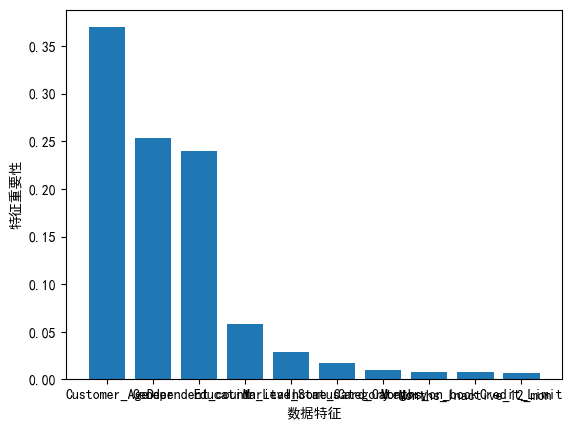

梯度提升决策树准确度: 0.8415597235932872
其他指标：
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1699
           1       0.64      0.04      0.08       327

    accuracy                           0.84      2026
   macro avg       0.74      0.52      0.50      2026
weighted avg       0.81      0.84      0.78      2026



In [216]:
# 画柱状图
plt.bar(df_gdbt.columns, importances_df['importance'])
plt.xlabel('数据特征')
plt.ylabel('特征重要性')
plt.show()
# 在测试集上进行预测
y_pred = gbdt.predict(x_test)
print("梯度提升决策树准确度:", gbdt.score(x_test, y_test))
print("其他指标：\n", classification_report(y_test, y_pred))

In [217]:
# 创建 GBDT 模型
gbdt1 = GradientBoostingClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
 
# 创建 GridSearchCV 对象
y_train1 = y_train.values.ravel()
grid_search = GridSearchCV(gbdt1, parameters, cv=5)
grid_search.fit(x_train,y_train1)
 
# 获取最佳参数
best_params = grid_search.best_params_
print('Best Parameters Found:',best_params)

Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


In [227]:
best_gbdt = GradientBoostingClassifier(**best_params)
# 训练模型
best_gbdt.fit(x_train, y_train)
# 在测试集上进行预测
y_pred = best_gbdt.predict(x_test)
# 在测试集上评估最终模型
test_score = best_gbdt.score(x_test, y_test)
print("最优参数下的梯度提升决策树准确度:", test_score)
print("其他指标：\n", classification_report(y_test, y_pred))

D:\python\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


最优参数下的梯度提升决策树准确度: 0.8390918065153011
其他指标：
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1699
           1       0.51      0.08      0.14       327

    accuracy                           0.84      2026
   macro avg       0.68      0.53      0.53      2026
weighted avg       0.79      0.84      0.79      2026

